![](pictures/amberd.jpg)

## Previous Workshop

In the previous workshop, Armen discussed about the Single Linear Regression.  

- How to Run it using Scikitlearn
- Check Assumption

## In this workshop

1. Talk about modeling
    - Why Important
    - Trying to make guessings
    - Distributions
2. Modeling with 1 distribution 
    - Basic Modeling

- Trying to pick best value
- Introducing other outside information (1 X)
- See how tht improves
- Introduce (2 X's)
- Check assumptions 
- Interpretation

## Modeling

Modeling is trying to make predictions based off evidence or information that you know. 

$$ Y = F(X) $$

Example:

**If you were to guess someone's salary. What would you do?**

- What questions would you ask? 
- What extra information would you like to know?

$$ Y = F(?) $$

There can be an infinite number of things that go in and play a hand in estimating a person's income or any Y for that matter, but we want to find a way to explain and predict in a simple manner. 

Unless you know the true process of what goes in, your models are just estimates and estimates that try to explain what is happening.



<p style="text-align: center;">This is why you have the famous quote by George Box below. </p>


![](pictures/models_are_wrong.jpg)



## Statistical/Machine Learning


We want to see if we can get our machine to figure out the patterns behind this process without explicitly telling it to do. 

If you think about how a human learns?
- It's through education and experience. 

- You can try to quantify your experience and lessons through datapoints in your life. 


#### Example)

**What happens when you put your hand on the stove?:** 

![](pictures/hot_stove.jpeg) 


![](pictures/dont-touch.jpeg)

You get burned.


<br>


Let's try to quantify what happened?



| Hand Burned (Y) | Hand on Stove (X) |   
|-------------|---------------|
| Yes         | Yes           |
| No          | No            |
| No            | No              |
| Yes            | Yes              |


- So you have quantified your experience in the form of data. 
- You either learn this from making your own mistakes, collecting your datapoints and discovering yourself or learn from somebody else. 
- This is kind of the basis of machine learning to get the machine to learn things

The objective here is can we get the machine to understand this relationship without us having to explicitly tell the machine that when you put your hand on the stove, you will get burned. 

The way that we learn from this experience, we can try to get the machine to learn from this data above. 


That is the basis of modeling. There are things that you can observe or control (x) that can help predict something else (Y). 


## Machine Learning 

So for machine learning there are a couple of different learning techniques. The two biggest ones are supervised and unsupervised learning

![](pictures/machine_learning.png)

<br>


<br>


### Supervised Learning

With supervised learning, you have your data and also past examples (data) on what you want to predict. 
You are telling the machine to create a model using the past data to supervise its training. 


<br>

### Data Types

If you think about the data types you can have, you can either have numerical or categorical. 

- Numerical: representing any number
    - Example: 1,2,3,1.5, 7, 1000
    
- Categorical: Representing any category 
    - Example: Ethnicity, High/Low/Medium

So these are values that you can try to predict (outputs) or use as inputs. 

Because these 2 are two different categories, there are different models that handle the two different tasks. 

1. Regression models for numerical data
2. Classification models for categorical data

<br>

### Unsupervised Learning

We will not be jumping into this one, but for coverage, with unsupervised learning, the machine does not exactly know what to be looking for so it just tries to find patterns on its own. 








# Questions? 

![](pictures/questions.jpg)

## Modeling: Linear Regression. 


## Use Case: 
    - Y Ouput: Numeric and Continuous 
        - Continous: Can go infinitely small, technically no limit and expand to cover any range of numbers.
    - X Variables: Numeric or Categorical (Continous or Discrete)
        - Continous: Can go infinitely small, technically no limit and expand to cover any range of numbers.
        - Discrete: When variables can only take on certain numbers or levels. 
            - You cannot divide the number 
            
### Main Technique:
    - This draws a linear line of Best Fit
    - how does it know what line to best draw?
       
### Optimization Function:
    - How do you know if something is good or bad? 
        - You boil it down to a KPI
    - Optimizing for MSE 

![](pictures/mse_formula.png)

### Equation:
$$\hat{Y} = B_0 + B_1X  + B2_X + B3_X + e$$
![](pictures/equation.jpeg)



# Building it up to MLR. 

Before we build up to more complex models its keep it simple and then improve and iterate on it. 

Let's start off with one variable and understanding distributions. 


## Distributions and Random Variable


*What is a random variable distribution?*

When you are looking at a variable (in this case, continous distributions). You see a big spectrum of values that it can take on. You assume it is randomly distributed around. certain points.

What can you tell me about the plot below.


In [57]:
# Saw you are given the task of predicting sepal length. What would you do?

import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris['data']
iris_df = pd.DataFrame(X, columns = ["sepal_length", 'sepal_width', 'petal_length', 'petal_width'])[0:50]
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


(array([ 4.,  1.,  6.,  5., 12.,  7.,  4.,  5.,  2.,  3.]),
 array([4.3 , 4.45, 4.6 , 4.75, 4.9 , 5.05, 5.2 , 5.35, 5.5 , 5.65, 5.8 ]),
 <a list of 10 Patch objects>)

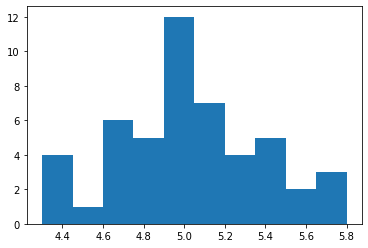

In [52]:
plt.hist(iris_df["sepal_length"])


In [56]:
# You would run summary statistics on it and get the statistics of your distribution
iris_df["sepal_length"].describe()

count    49.000000
mean      5.004082
std       0.355879
min       4.300000
25%       4.800000
50%       5.000000
75%       5.200000
max       5.800000
Name: sepal_length, dtype: float64

Now, say you see a new flower and you are asked to make a prediction about the sepal length. Not knowing anything else, if you had to choose one value what would you choose?

Which value do you see the most? Above? Which would minimize your MSE above?

In [90]:
def mean_square_error(df, y_hat):
    '''
    MSE = 1/n((y - y_hat)^2)
    '''
    y = np.array(df)
    error = y-y_hat
    squared_error = error**2
    mean_squared_error_value = np.mean(squared_error)
    return(mean_squared_error_value)
import numpy as np
y_hat_values = np.arange(4.0, 6.0, 0.1)

loss_function = []
for y_hat in y_hat_values:
    y_hat_loss = mean_square_error(iris_df["sepal_length"], y_hat)
    loss_function.append(y_hat_loss)

In [81]:
len(loss_function)

20

In [85]:
print(np.array(y_hat_values))
print(np.array(loss_function))

[4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7
 5.8 5.9]
[1.1338 0.9426 0.7714 0.6202 0.489  0.3778 0.2866 0.2154 0.1642 0.133
 0.1218 0.1306 0.1594 0.2082 0.277  0.3658 0.4746 0.6034 0.7522 0.921 ]


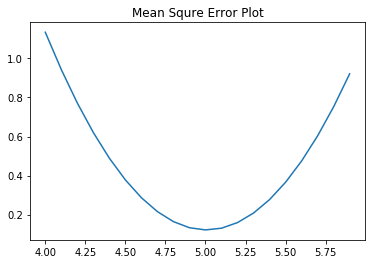

In [87]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(np.array(y_hat_values), np.array(loss_function))
plt.title("Mean Squre Error Plot")
plt.show()

Visually, It seems like your best prediction is about 5.0.
Let's see if you can program the computer to find it.

To better optimize there is the idea of gradient descent. 
This is where you start off at any point or value and make your way down the concave loss function above. 

You start off on a random point find the gradient that goes closer to the bottom and take a step there descenting down into that direction. 
The machine learns to change the coefficients to take a step into the direction of less error.

![](pictures/learning_rate.png)
![](pictures/derivative.png)


So your model right now is:

$$\hat{y} = 5.005$$

This is assuming you no no other information...

Your model will look like:




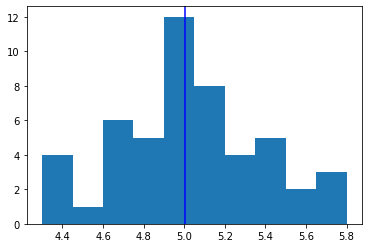

In [98]:
plt.hist(iris_df["sepal_length"])
plt.axvline(x = np.mean(iris_df["sepal_length"]), color = 'b', label = 'axvline - full height')
plt.show()

In [ ]:
Instead of having you code up gradient descent from scratch you can just use the functions

from sklearn.linear_model import LinearRegression
X, y = iris_df["sepal_width"].values.reshape(-1,1), iris_df["sepal_length"].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_)

import statsmodels.api as sm
# Let's declare our X and y variables
X = iris_df["sepal_width"]
y = iris_df["sepal_length"]
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()


So you can technically right this as. 

$$\hat{y} = 5.005 + 0X_1 + 0X_2 + 0X_3$$

At this point you have used up all the information from the main variable iteself, can you incorporate other variables? let's take a look are there other variables that are linearly related?

sepal_width looks like a good candidate



### Adding an extra dimension

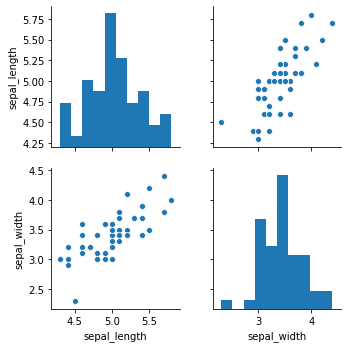

In [112]:
import seaborn as sns
sns.pairplot(iris_df.iloc[:,:2])

So now you are telling the machine okay, using the sepal width predict the sepal length and find the weights that best suit it.

$$\hat{y} = ? + ?X_1 + 0X_2 + 0X_3$$

In [141]:
from sklearn.linear_model import LinearRegression
X, y = iris_df["sepal_width"].values.reshape(-1,1), iris_df["sepal_length"].values.reshape(-1,1)
reg = LinearRegression().fit(X, y)
print(reg.intercept_, reg.coef_)

[2.63900125] [[0.69048972]]


In [140]:
import statsmodels.api as sm
# Let's declare our X and y variables
X = iris_df["sepal_width"]
y = iris_df["sepal_length"]
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     58.99
Date:                Sat, 22 May 2021   Prob (F-statistic):           6.71e-10
Time:                        21:58:22   Log-Likelihood:                 1.7341
No. Observations:                  50   AIC:                            0.5319
Df Residuals:                      48   BIC:                             4.356
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.6390      0.310      8.513      0.000       2.016       3.262
sepal_width     0.6905      0.090      7.681      0.000       0.510       0.871
==============================================================================
Omnibus:                        0.274   Durbin-Watson:                   2.542
Prob(Omnibus):                  0.872   Jarque-Bera (JB):                0.464
Skew:                          -0.041   Prob(JB):                        0.793
Kurtosis:                       2.535   Cond. No.                         34.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

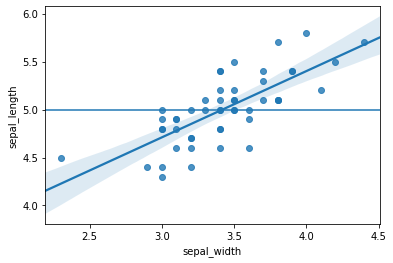

In [146]:
graph = sns.regplot(x="sepal_width", y="sepal_length", data=iris_df)
#Drawing a horizontal line at point 1.25
graph.axhline(5)
#The plot is shown
plt.show()

The model shifted from 

$$\hat{y} = 5.005 + 0X_1 + 0X_2 + 0X_3$$

to 

$$\hat{y} = 2.639 + .6905X_1 + 0X_2 + 0X_3$$


In this interpretation, now, say we want to know how changing one thing would affect us. 
If we want to know how a change in this would affect it what would we do derivative.
Taking the derivative of your equation with respect ot the vairable you care about.
Assuming all else equal, on average, one unit increase of x1 would result in B1 change 

When you add an extra dimension you see how your point changed to a line and added some flexibility.


### Can we improve on it by adding additional information? 

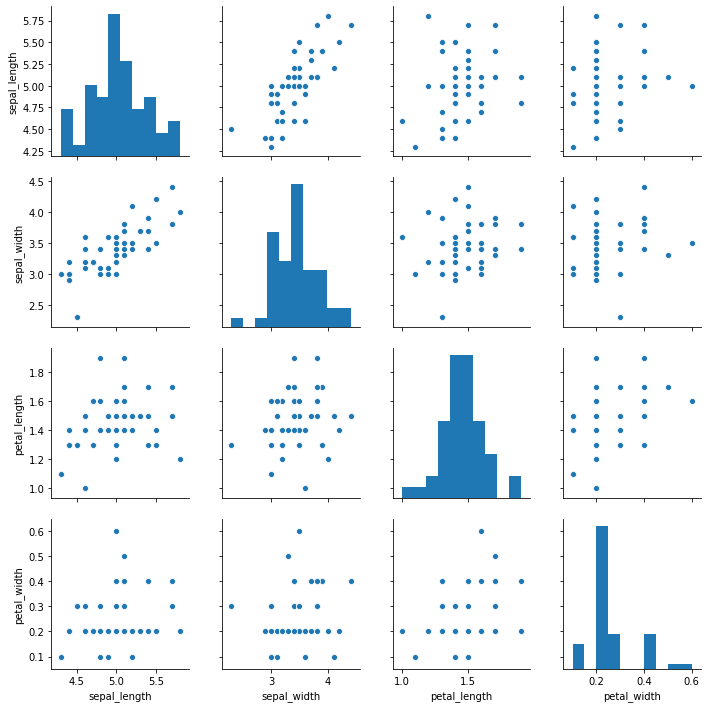

In [147]:
sns.pairplot(iris_df)

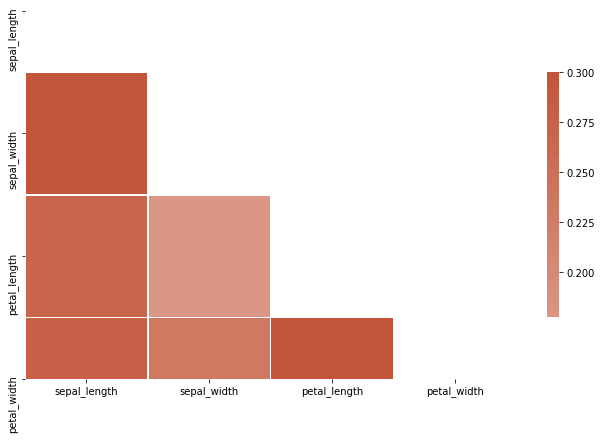

In [148]:
# Compute the correlation matrix
corr = iris_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [159]:
import plotly.express as px


df = px.data.iris().iloc[0:50]
fig = px.scatter(
    df, x='sepal_width', y='sepal_length', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [161]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.svm import SVR

mesh_size = .02
margin = 0

df = px.data.iris().iloc[0:50]

X = df[['sepal_width', 'sepal_length']]
y = df['petal_width']

# Condition the model on sepal width and length, predict the petal width
model = LinearRegression()
model.fit(X, y)

# Create a mesh grid on which we will run our model
x_min, x_max = X.sepal_width.min() - margin, X.sepal_width.max() + margin
y_min, y_max = X.sepal_length.min() - margin, X.sepal_length.max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Run model
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

# Generate the plot
fig = px.scatter_3d(df, x='sepal_width', y='sepal_length', z='petal_width')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

As you add more dimensions you model incorporates more complexity and becomes a hyperplane.
Your model can get better but it can also get worse be careful. 


### MLR Assumptions 

Since linear regressions are widely used there are five basic assumption to be considered before accepting to use linear regression; as following :

1. Linearity: the simple meaning of linearity is understand from scatter plot which is the straight line that drawn in between points on scatter plot. The line used to have intercept on vertical axis which is dependent axis i.e the target variable. If the line is not straight, hence, non-linear regression is to be used.
    - Solution: Adding nonlinear terms to the model or applying transformations

2. Indepedence: Not only with other variables (avoid multicolinearity), but with the error term as well (avoid endogeniety), and also making sure that everything is iid (avoid autocorrrelation).
    - Drop Variables, dimension reduction
    - IV regression
    - Check using Durbin Watson Test

3. Normality: make sure that that the residuals are normally distributed.
- A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

4. Expected Variance (Homoscedastic): Making sure that the variance is constant throughout. 
    - Solution: Transformations oor robust standard errors



If these assumptions are met, they would say the linear regression model is BLUE:
Best
Linear
Unbiased 
Estimates

## Checking for Linearity

Since linear regression is a linear model, it is great at modeling linear relationships. The best way to check if there is a linear relationship between plotting it out using a scatter plot and correlation matrix earlier

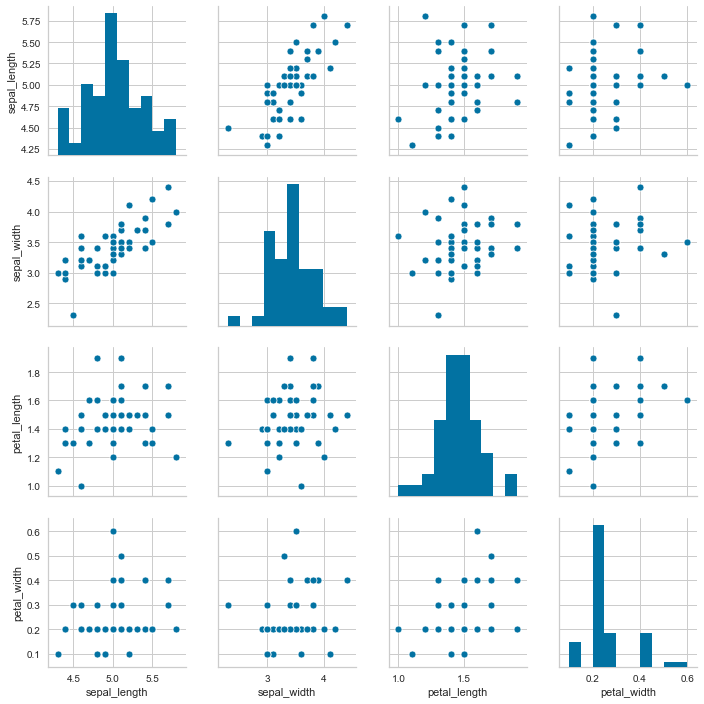

In [194]:
sns.pairplot(iris_df)

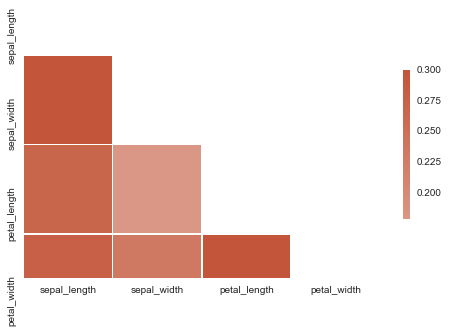

In [195]:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Example with dealing with a pattern but that is nonlinear

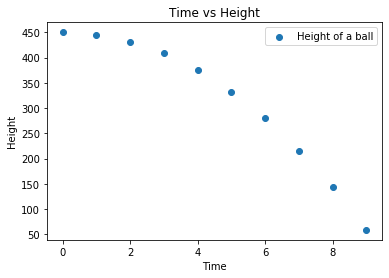

In [170]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
time = np.arange(10)
height = np.array([450,445,430,409,375,331,280,215,144,59])

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(time,height,label='Height of a ball')
plt.title("Time vs Height")
plt.xlabel('Time')
plt.ylabel('Height')
plt.legend()
plt.show()

In [179]:
dataset = pd.DataFrame()
dataset['time'] = time
dataset['height'] = height
fig = px.scatter(
    dataset, x='time', y='height', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [186]:
X = dataset['time']
y = dataset['height']
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     95.65
Date:                Sun, 23 May 2021   Prob (F-statistic):           1.00e-05
Time:                        09:53:23   Log-Likelihood:                -49.998
No. Observations:                  10   AIC:                             104.0
Df Residuals:                       8   BIC:                             104.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        508.3091     23.594     21.544      0.000     453.900     562.718
time         -43.2242      4.420     -9.780      0.000     -53.416     -33.033
==============================================================================
Omnibus:                        1.462   Durbin-Watson:                   0.457
Prob(Omnibus):                  0.481   Jarque-Bera (JB):                0.999
Skew:                          -0.545   Prob(JB):                        0.607
Kurtosis:                       1.899   Cond. No.                         10.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

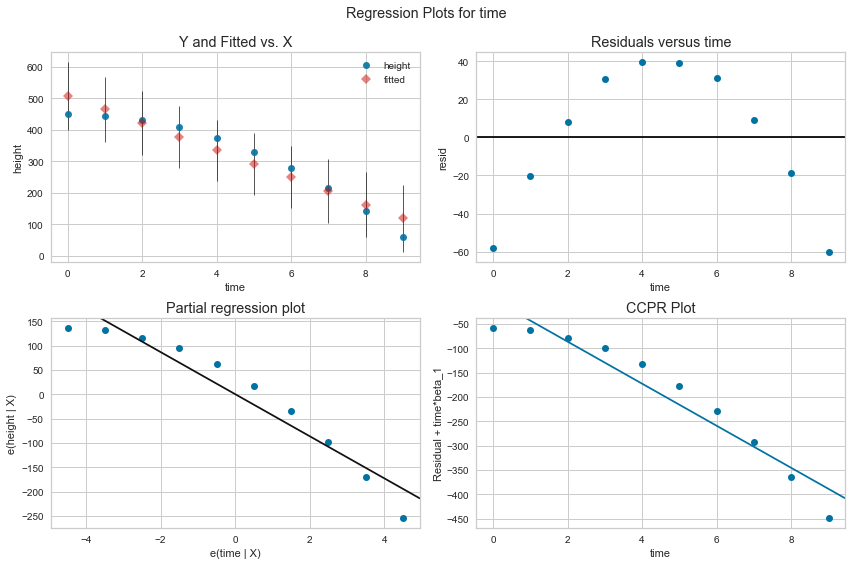

In [188]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(results, 'time', fig=fig)

# you normally want your residuals to be normally randomly distributed. If you see a pattern like this, thatt means that you can do a much better job at modeling.

You can see above the problems with fitting a linear model to a nonlinear model.

To turn add a nonlinear component, you can transform your y or x into nonlinear terms and try plotting that through a linear plot. 



In [180]:
dataset['time_sq'] = time**2
fig = px.scatter(
    dataset, x='time_sq', y='height', opacity=0.65,
    trendline='ols', trendline_color_override='darkblue'
)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [190]:
X = dataset['time_sq']
y = dataset['height']
# With Statsmodels, we need to add our intercept term, B0, manually
X = sm.add_constant(X)
X.head()

model = sm.OLS(endog=y, exog=X)
results = model.fit()
# Show the summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 height   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.975e+04
Date:                Sun, 23 May 2021   Prob (F-statistic):           4.73e-17
Time:                        09:55:42   Log-Likelihood:                -17.440
No. Observations:                  10   AIC:                             38.88
Df Residuals:                       8   BIC:                             39.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        450.9621      0.714    631.972      0.000     449.317     452.608
time_sq       -4.8127      0.018   -264.095      0.000      -4.855      -4.771
==============================================================================
Omnibus:                        0.952   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.618
Skew:                          -0.009   Prob(JB):                        0.734
Kurtosis:                       1.782   Cond. No.                         57.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

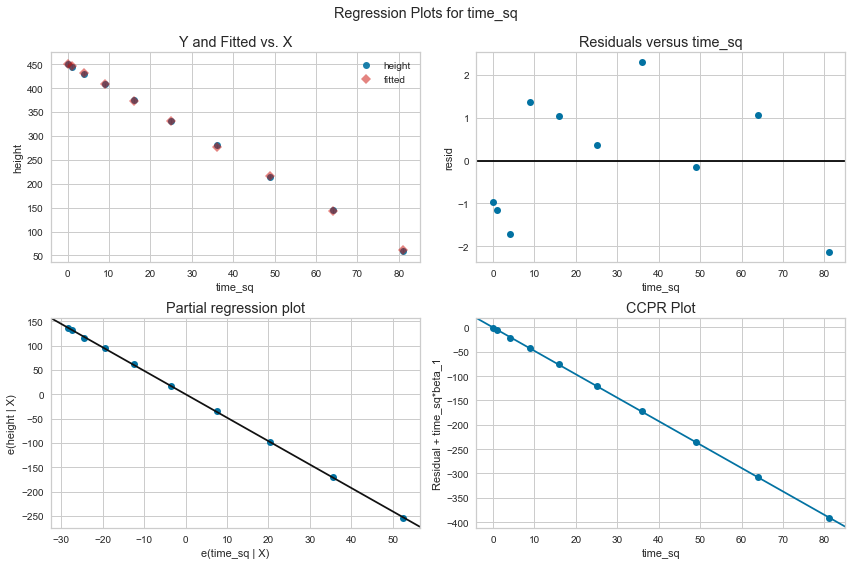

In [191]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(results, 'time_sq', fig=fig)

## Independence

So ideally when you are running a regression you want to make sure that your terms are independent of each other. As your variables correlate more with each other, it's harder for the model to learn which variable to listen to more. Because its less confident, the coefficients might shift or the variance might increase resulting in values being not statistically significant.

- VIF = 1 → No correlation
- VIF = 1 to 5 → Moderate correlation
- VIF >10 → High correlation

In [199]:
from sklearn.datasets import load_boston
import statsmodels.formula.api as sm
boston = load_boston()
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

#As you can imagine there alot of variables 

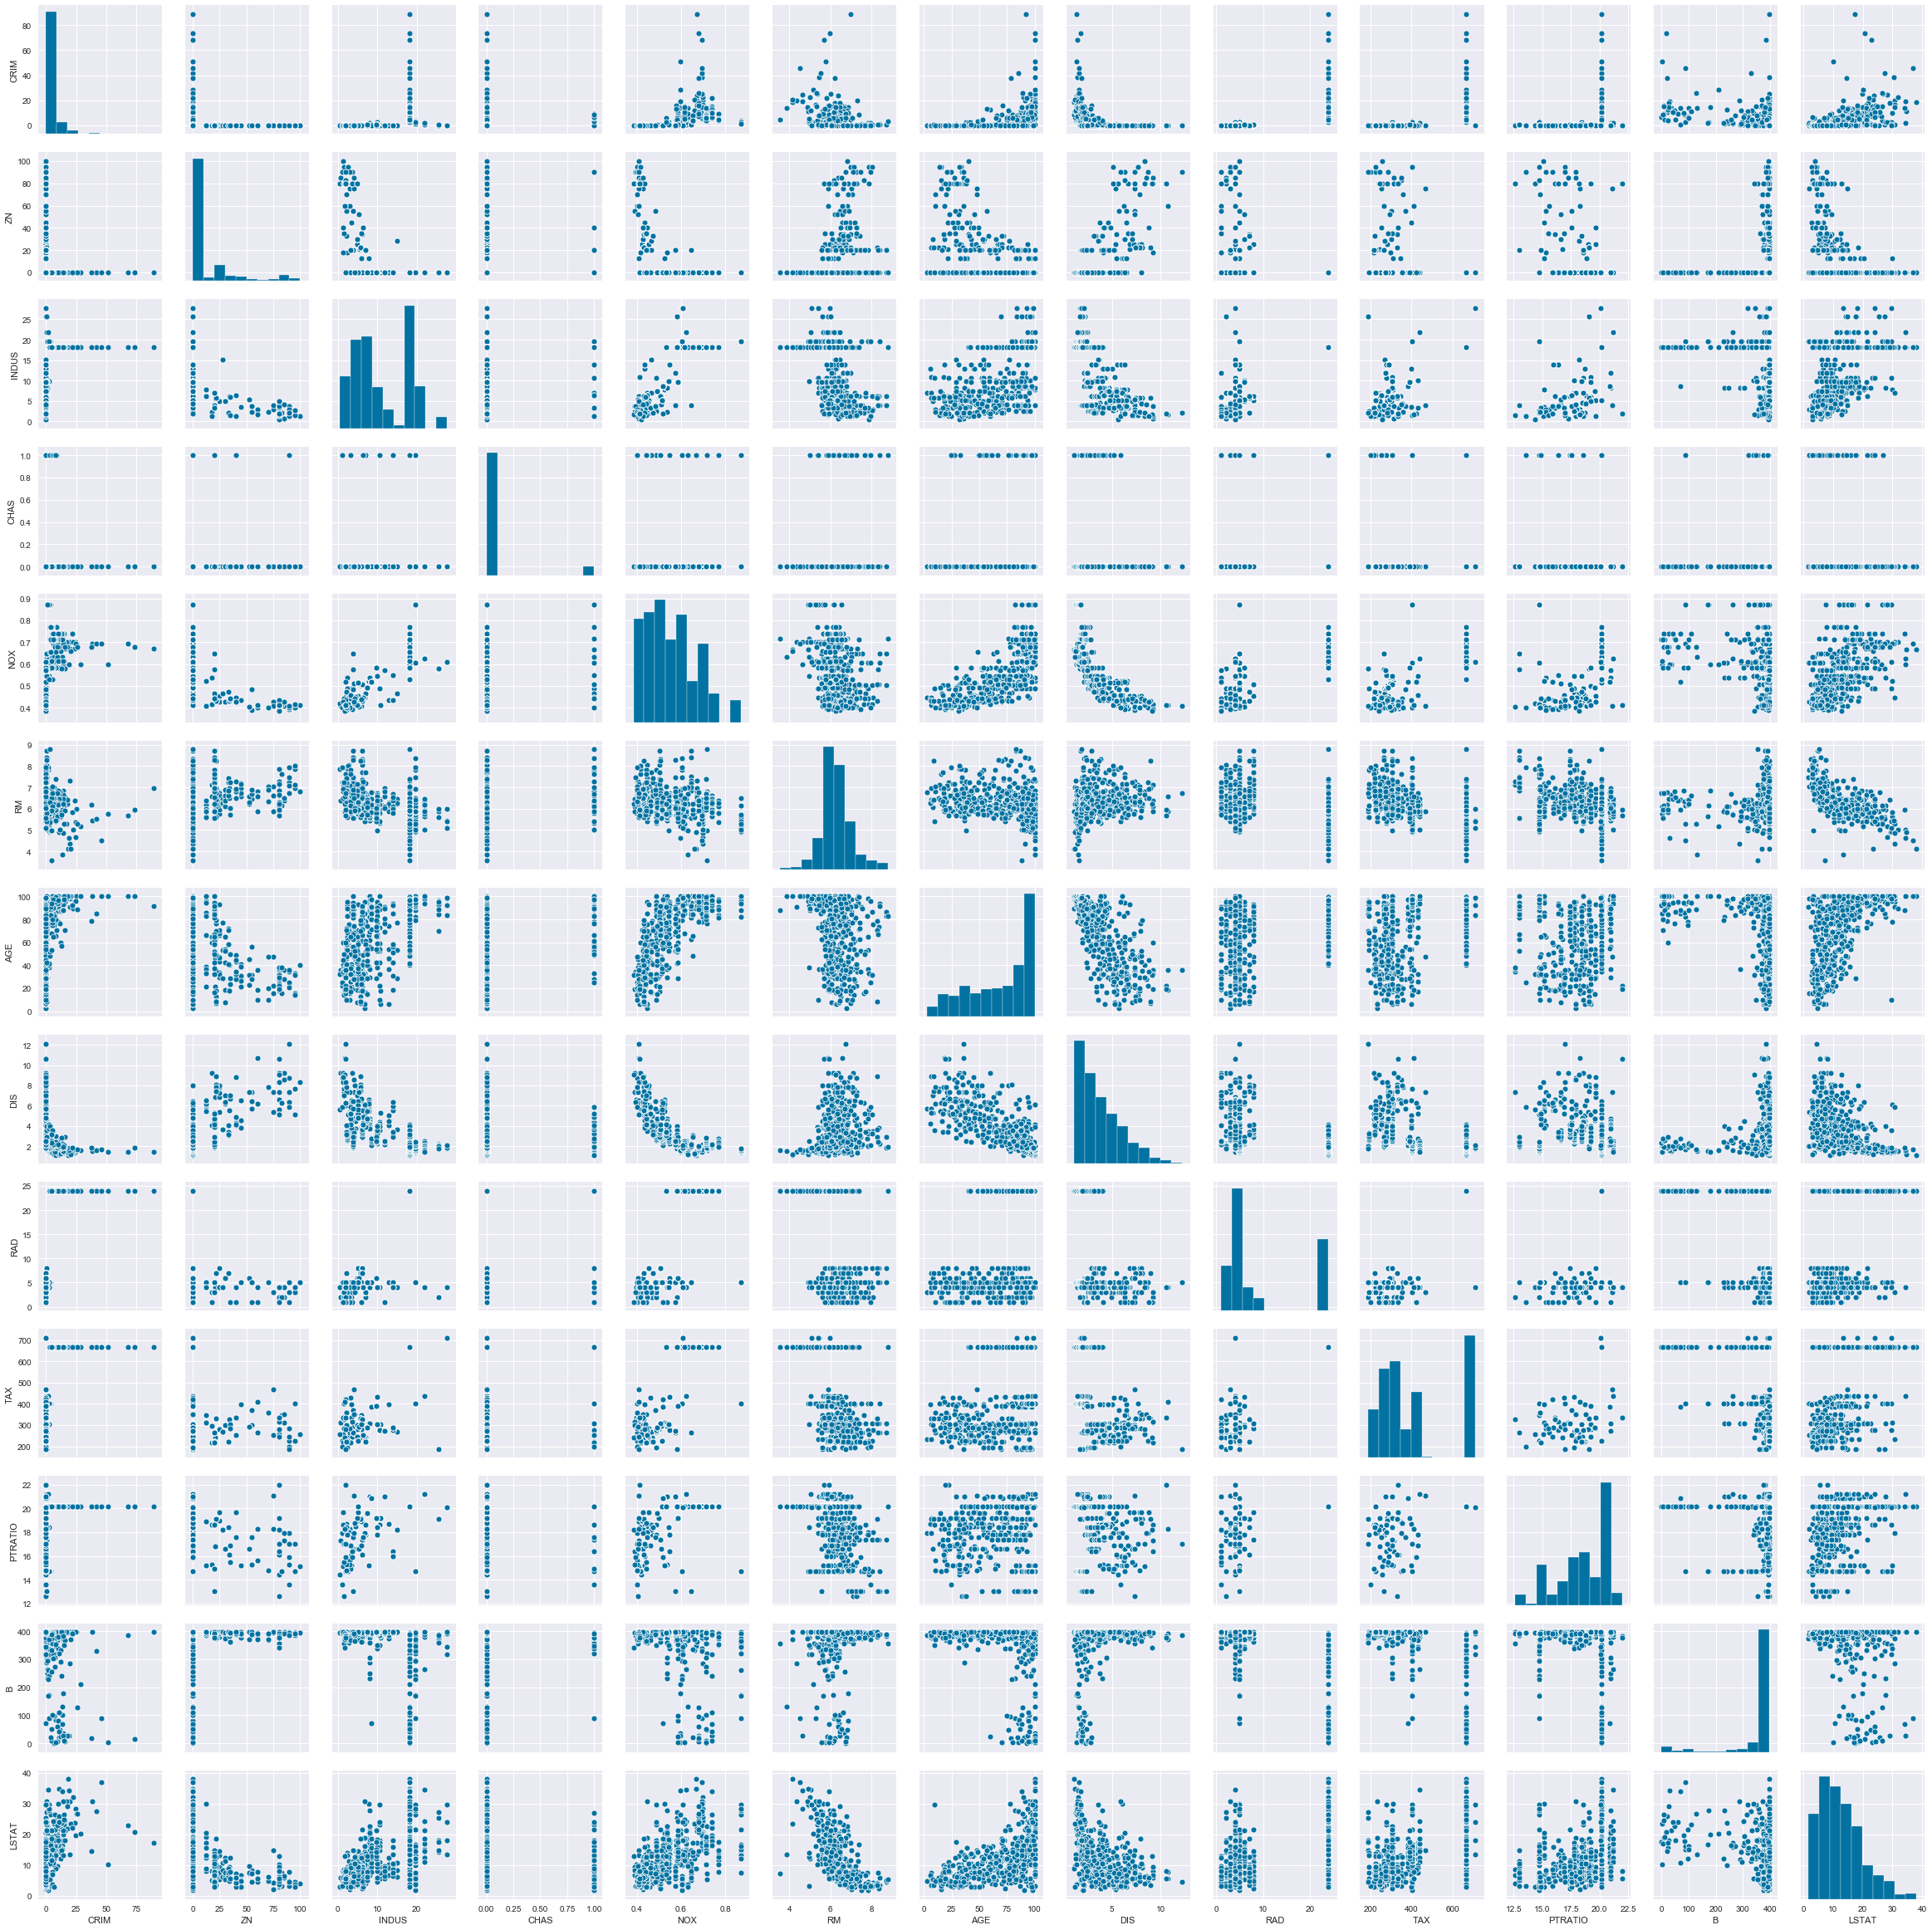

In [202]:
sns.pairplot(df_x)

In [204]:
xvar_names = df_x.columns
for i in range(0, xvar_names.shape[0]):
    y = df_x[xvar_names[i]]
    x = df_x[xvar_names.drop(xvar_names[i])]
    rsq = sm.ols(formula = "y ~x", data = df_x).fit().rsquared
    vif = round(1/(1-rsq),2)
    print(xvar_names[i], " VIF = ", vif)

CRIM  VIF =  1.79
ZN  VIF =  2.3
INDUS  VIF =  3.99
CHAS  VIF =  1.07
NOX  VIF =  4.39
RM  VIF =  1.93
AGE  VIF =  3.1
DIS  VIF =  3.96
RAD  VIF =  7.48
TAX  VIF =  9.01
PTRATIO  VIF =  1.8
B  VIF =  1.35
LSTAT  VIF =  2.94


Solutions:
- Drop the variables
- Run a partial regression
- User Ridge
- Run PCA

## Normality

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline


"""
Real-world data of Boston housing prices
Additional Documentation: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

Attributes:
data: Features/predictors
label: Target/label/response variable
feature_names: Abbreviations of names of features
"""
boston = datasets.load_boston()


"""
Artificial linear data using the same number of features and observations as the
Boston housing prices dataset for assumption test comparison
"""
linear_X, linear_y = datasets.make_regression(n_samples=boston.data.shape[0],
                                              n_features=boston.data.shape[1],
                                              noise=75, random_state=46)

# Setting feature names to x1, x2, x3, etc. if they are not defined
linear_feature_names = ['X'+str(feature+1) for feature in range(linear_X.shape[1])]

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['HousePrice'] = boston.target

# Fitting the model
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# Returning the R^2 for the model
linear_r2 = linear_model.score(linear_X, linear_y)
print('R^2: {0}'.format(linear_r2))

R^2: 0.873743725796525


Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.33506604584662064
Residuals are normally distributed


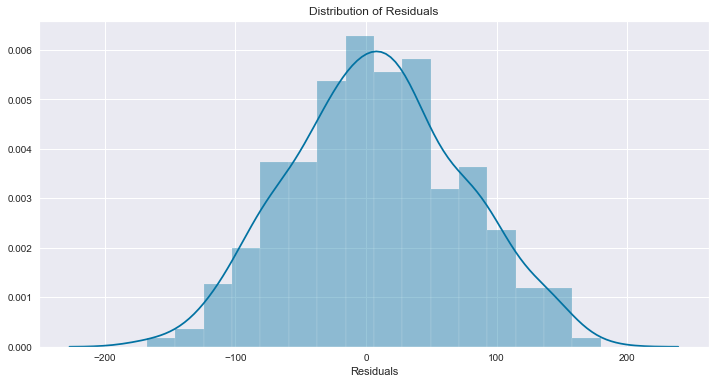


Assumption satisfied


In [214]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')

normal_errors_assumption(linear_model, linear_X, linear_y)
       

## Summary 

what we did was take a data science approach,
we started off with something basic (summary statistic) and expanded it with one variable and then two and then provided the framework to expand on it. 
You should be able to understand the basic of linear regression, the interpretation, and also the cost function and be able to even build it out on your own. 
It was also covered what happens when your parameters or assumptions of the linear regression are not met and how does that affect your model.


Next Steps:
    - This model is actually the first building block step into more complicated models such as:
        - Stepwise Regression
        - Lasso and Ridge Regression
        - Logistic Regression
        - Neural Networks
        - Regression Splines
        - Poisson Regression
        - Time Series Modeling
        - Instrumental Variables
        - Panel Data



Resources and References:

- Introduction to Statistical Learning
- Elements of Statistical Learning
- Introduction to Econometrics by Wooldridge
- Khan Academy
- Ritvik Khakhar's Video (Seriously check it out)

## Unused code:

import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
#linearity_test(lin_reg, y)   